In [1]:
import sklearn
import pandas as pd
import numpy as np

In [2]:
data_train = pd.read_csv('train.csv')

In [3]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

### Оценка влияния признаков на целевую переменную (по отдельности)

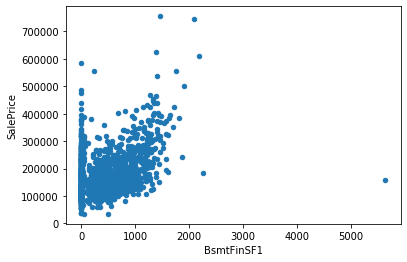

In [176]:
data_train.plot(x = 'BsmtFinSF1', y = 'SalePrice', kind='scatter')

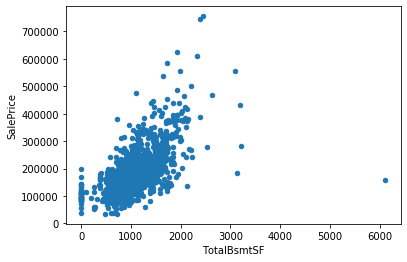

In [179]:
data_train.plot(x = 'TotalBsmtSF', y = 'SalePrice', kind='scatter')

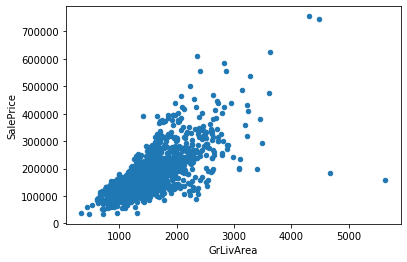

In [183]:
data_train.plot(x = 'GrLivArea', y = 'SalePrice', kind='scatter')

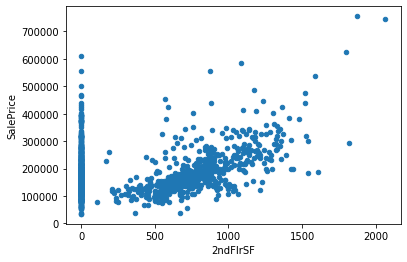

In [184]:
data_train.plot(x = '2ndFlrSF', y = 'SalePrice', kind='scatter')

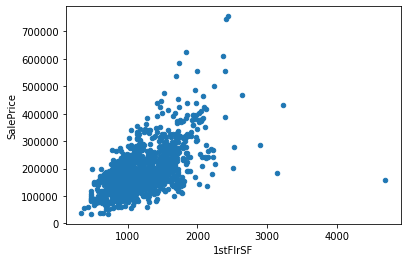

In [185]:
data_train.plot(x = '1stFlrSF', y = 'SalePrice', kind='scatter')

### Смотрим коэффициенты корреляции признаков между собой

In [9]:
import seaborn as sns

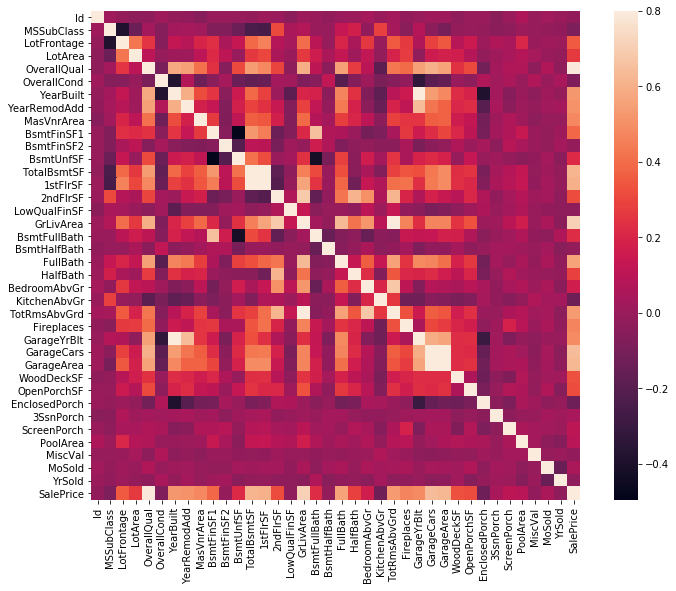

In [10]:
corrmat = data_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [30]:
data_train[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'GarageCars']].corr()

,OverallQual,YearBuilt,YearRemodAdd,GarageCars
OverallQual,1.000000,0.572323,0.550684,0.600671
YearBuilt,0.572323,1.000000,0.592855,0.537850
YearRemodAdd,0.550684,0.592855,1.000000,0.420622
GarageCars,0.600671,0.537850,0.420622,1.000000


In [32]:
data_train[['YearBuilt', 'GarageYrBlt']].corr()

,YearBuilt,GarageYrBlt
YearBuilt,1.000000,0.825667
GarageYrBlt,0.825667,1.000000


In [33]:
data_train[['BsmtFinSF1', 'BsmtFullBath']].corr()

,BsmtFinSF1,BsmtFullBath
BsmtFinSF1,1.000000,0.649212
BsmtFullBath,0.649212,1.000000


In [34]:
data_train[['TotalBsmtSF', '1stFlrSF']].corr()

,TotalBsmtSF,1stFlrSF
TotalBsmtSF,1.00000,0.81953
1stFlrSF,0.81953,1.00000


In [39]:
data_train[['GrLivArea', '2ndFlrSF', 'TotRmsAbvGrd']].corr()

,GrLivArea,2ndFlrSF,TotRmsAbvGrd
GrLivArea,1.000000,0.687501,0.825489
2ndFlrSF,0.687501,1.000000,0.616423
TotRmsAbvGrd,0.825489,0.616423,1.000000


In [44]:
data_train[['GarageYrBlt', 'GarageCars', 'GarageArea']].corr()

,GarageYrBlt,GarageCars,GarageArea
GarageYrBlt,1.000000,0.588920,0.564567
GarageCars,0.588920,1.000000,0.882475
GarageArea,0.564567,0.882475,1.000000


In [46]:
# удаляем сильно кор. признаки
data_train = data_train.drop(['TotRmsAbvGrd', '1stFlrSF', 'BsmtFullBath', 'GarageYrBlt', 'GarageArea'], axis=1)

### Оцениваем пропущенные значения в признаках

In [ ]:
total = data_train.isnull().sum().sort_values(ascending=False)
percent = total / data_train.shape[0] * 100
statistic = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [ ]:
statistic.head(15) # Будем удалять признаки, в которых процент пропущенных >= 15

In [ ]:
# удаляем плохие
data_train = data_train.drop(['LotFrontage', 'FireplaceQu', 'Fence', 'Alley', 'MiscFeature', 'PoolQC'], axis=1)